## Introduction

Unemployment in EU (~1983 - 2020)
Grouped on country, sex, age interval (<25, 25-74, total).


## Data preparation

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import folium
from folium.plugins import HeatMap, HeatMapWithTime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_df = pd.read_csv(os.path.join("..", "data", "data-europa-eu-euodp", "une_rt_m.tsv"), sep='\t')

In [3]:
data_df.shape

(2077, 449)

In [4]:
data_df.head()

,"s_adj,age,unit,sex,geo\time",2020M04,2020M03,2020M02,2020M01,2019M12,2019M11,2019M10,2019M09,2019M08,...,1983M10,1983M09,1983M08,1983M07,1983M06,1983M05,1983M04,1983M03,1983M02,1983M01
0,"NSA,TOTAL,PC_ACT,F,AT",:,5.0,4.2,4.4,4.0,3.9,4.2,3.8,4.8,...,:,:,:,:,:,:,:,:,:,:
1,"NSA,TOTAL,PC_ACT,F,BE",:,4.7,4.6,4.6,4.5,4.6,4.8,5.0,5.3,...,:,:,:,:,:,:,:,:,:,:
2,"NSA,TOTAL,PC_ACT,F,BG",:,3.9,3.6,3.8,3.7,3.8,3.7,3.4,3.4,...,:,:,:,:,:,:,:,:,:,:
3,"NSA,TOTAL,PC_ACT,F,CY",:,8.5,8.0,7.9,7.4,7.7,5.8,6.9,9.1,...,:,:,:,:,:,:,:,:,:,:
4,"NSA,TOTAL,PC_ACT,F,CZ",:,2.0,2.1,2.2,2.2,2.2,2.6,2.5,2.8,...,:,:,:,:,:,:,:,:,:,:


In [5]:
data_df.columns

Index(['s_adj,age,unit,sex,geo\time', '2020M04 ', '2020M03 ', '2020M02 ',
       '2020M01 ', '2019M12 ', '2019M11 ', '2019M10 ', '2019M09 ', '2019M08 ',
       ...
       '1983M10 ', '1983M09 ', '1983M08 ', '1983M07 ', '1983M06 ', '1983M05 ',
       '1983M04 ', '1983M03 ', '1983M02 ', '1983M01 '],
      dtype='object', length=449)

In [6]:
data_df['country'] = data_df['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[-1])
data_df['age'] = data_df['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[1])
data_df['unit'] = data_df['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[2])
data_df['sex'] = data_df['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[3])
data_df['s_adj'] = data_df['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[0])

In [7]:
data_df.head()

,"s_adj,age,unit,sex,geo\time",2020M04,2020M03,2020M02,2020M01,2019M12,2019M11,2019M10,2019M09,2019M08,...,1983M05,1983M04,1983M03,1983M02,1983M01,country,age,unit,sex,s_adj
0,"NSA,TOTAL,PC_ACT,F,AT",:,5.0,4.2,4.4,4.0,3.9,4.2,3.8,4.8,...,:,:,:,:,:,AT,TOTAL,PC_ACT,F,NSA
1,"NSA,TOTAL,PC_ACT,F,BE",:,4.7,4.6,4.6,4.5,4.6,4.8,5.0,5.3,...,:,:,:,:,:,BE,TOTAL,PC_ACT,F,NSA
2,"NSA,TOTAL,PC_ACT,F,BG",:,3.9,3.6,3.8,3.7,3.8,3.7,3.4,3.4,...,:,:,:,:,:,BG,TOTAL,PC_ACT,F,NSA
3,"NSA,TOTAL,PC_ACT,F,CY",:,8.5,8.0,7.9,7.4,7.7,5.8,6.9,9.1,...,:,:,:,:,:,CY,TOTAL,PC_ACT,F,NSA
4,"NSA,TOTAL,PC_ACT,F,CZ",:,2.0,2.1,2.2,2.2,2.2,2.6,2.5,2.8,...,:,:,:,:,:,CZ,TOTAL,PC_ACT,F,NSA


In [8]:
data_df.country.unique()

array(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EA', 'EA18', 'EA19',
       'EE', 'EL', 'ES', 'EU25', 'EU27_2007', 'EU27_2020', 'EU28', 'FI',
       'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'JP', 'LT', 'LU', 'LV', 'MT',
       'NL', 'NO', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK', 'UK', 'US', 'TR'],
      dtype=object)

In [9]:
data_df.sex.unique()

array(['F', 'M', 'T'], dtype=object)

In [10]:
data_df.age.unique()

array(['TOTAL', 'Y25-74', 'Y_LT25'], dtype=object)

In [11]:
data_df.unit.unique()

array(['PC_ACT', 'THS_PER'], dtype=object)

In [12]:
data_df.s_adj.unique()

array(['NSA', 'SA', 'TC'], dtype=object)

In [13]:
selected_cols = ['country','age','unit','sex', 's_adj', '2020M04 ','2020M03 ','2020M02 ','2020M01 ',
                 '2019M12 ','2019M11 ','2019M10 ','2019M09 ','2019M08 ','2019M07 ',
                 '2019M06 ','2019M05 ','2019M04 ','2019M03 ','2019M02 ','2019M01 ',
                '2018M12 ','2018M11 ','2018M10 ','2018M09 ','2018M08 ','2018M07 ',
                 '2018M06 ','2018M05 ','2018M04 ','2018M03 ','2018M02 ','2018M01 ',
                '2017M12 ','2017M11 ','2017M10 ','2017M09 ','2017M08 ','2017M07 ',
                 '2017M06 ','2017M05 ','2017M04 ','2017M03 ','2017M02 ','2017M01 ']

In [14]:
data_sel_df = data_df[selected_cols]

In [15]:
data_sel_df.shape

(2077, 45)

In [16]:
data_tr_df = data_sel_df.melt(id_vars=["country", "age", "unit", "sex", "s_adj"], 
        var_name="Date", 
        value_name="Value")

In [17]:
data_tr_df.head()

,country,age,unit,sex,s_adj,Date,Value
0,AT,TOTAL,PC_ACT,F,NSA,2020M04,:
1,BE,TOTAL,PC_ACT,F,NSA,2020M04,:
2,BG,TOTAL,PC_ACT,F,NSA,2020M04,:
3,CY,TOTAL,PC_ACT,F,NSA,2020M04,:
4,CZ,TOTAL,PC_ACT,F,NSA,2020M04,:


In [18]:
data_tr_df.shape

(83080, 7)

In [19]:
import re
data_tr_df['Value'] = data_tr_df['Value'].apply(lambda x: re.sub(r"[a-zA-Z: ]", "", x))
data_tr_df['Value'] = data_tr_df['Value'].apply(lambda x: x.replace(" ",""))

data_tr_df = data_tr_df.loc[~(data_tr_df.Value=="")]

data_tr_df['Value'] = data_tr_df['Value'].apply(lambda x: float(x))

In [20]:
data_tr_df['Value'].unique()

array([7.500e+00, 5.300e+00, 3.400e+00, ..., 2.206e+03, 1.914e+03,
       3.953e+03])

## Data visualization

In [21]:
total_y25_74_df = data_tr_df.loc[(data_tr_df.age=='Y25-74')&(data_tr_df.unit=='PC_ACT')&(data_tr_df.sex=='T')&(data_tr_df.s_adj=='TC')]

In [22]:
def plot_time_variation(df, y='Value', size=1, is_log=False, title=""):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))

    countries = list(df.country.unique())
    for country in countries:
        df_ = df[(df['country']==country)] 
        g = sns.lineplot(x="Date", y=y, data=df_,  label=country)  
        ax.text(max(df_['Date']), (df_.loc[df_['Date']==max(df_['Date']), y]), str(country))
    plt.xticks(rotation=90)
    plt.title(f'Total unemployment, {title}, grouped by country')
    ax.text(max(df_['Date']), (df_.loc[df_['Date']==max(df_['Date']), y]), str(country))
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()  


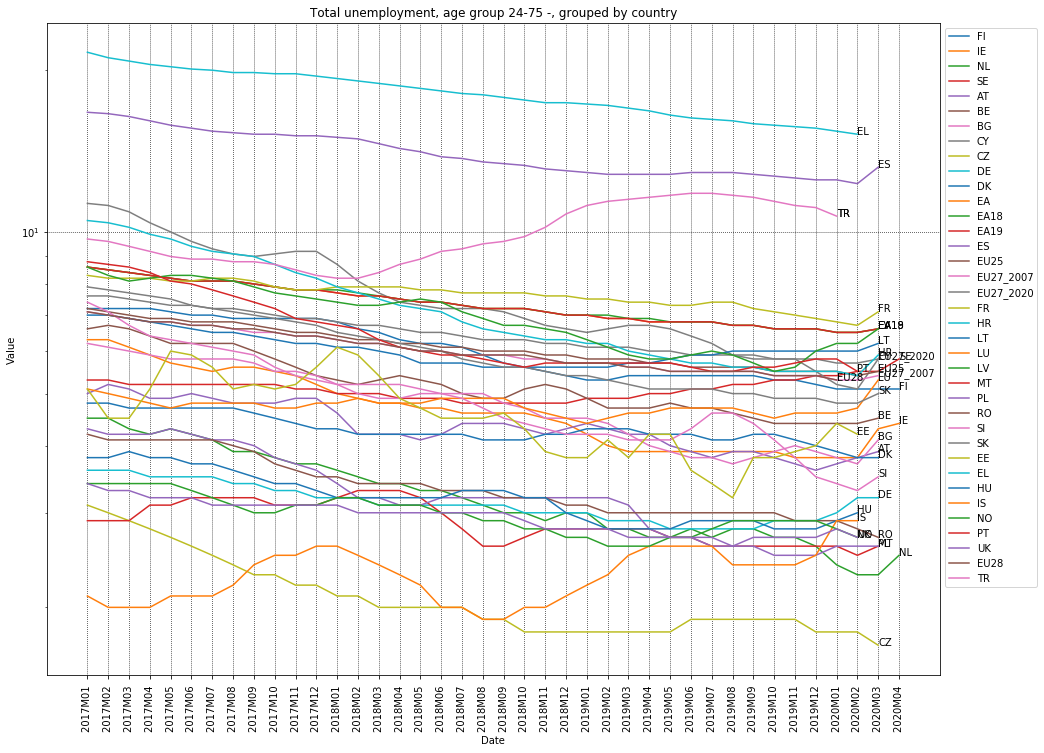

In [23]:
plot_time_variation(total_y25_74_df, size=4, is_log=True, title = "age group 24-75 -")

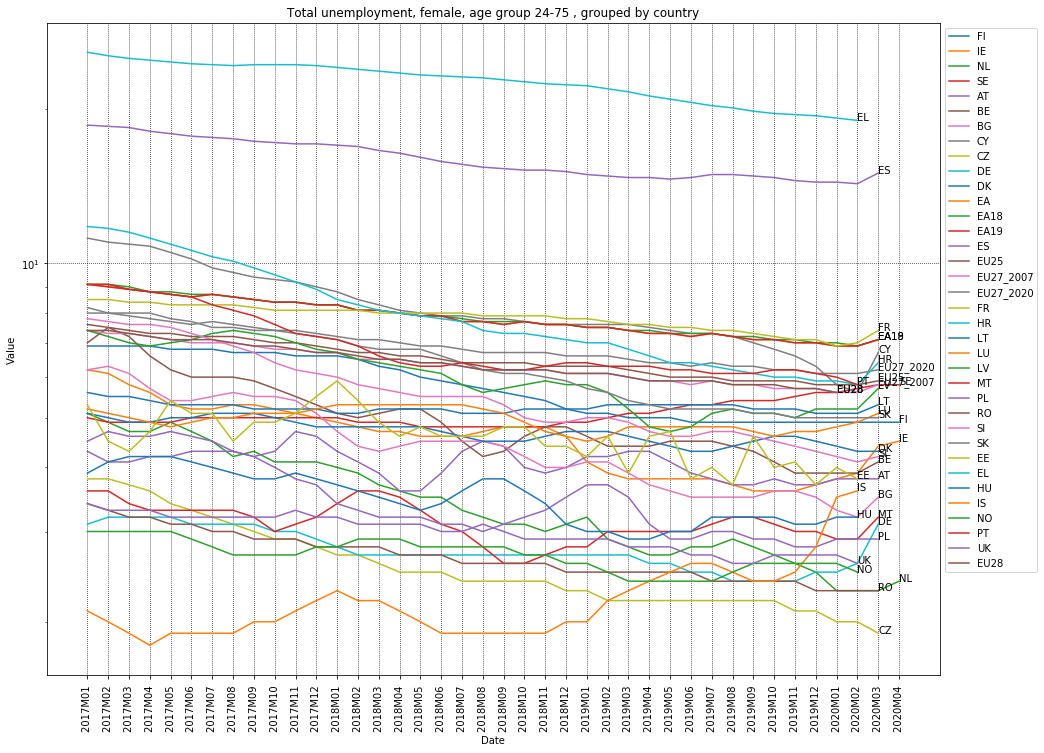

In [24]:
total_F_y25_74_df = data_tr_df.loc[(data_tr_df.age=='Y25-74')&(data_tr_df.unit=='PC_ACT')&(data_tr_df.sex=='F')&(data_tr_df.s_adj=='TC')]
plot_time_variation(total_F_y25_74_df, size=4, is_log=True, title = "female, age group 24-75 ")

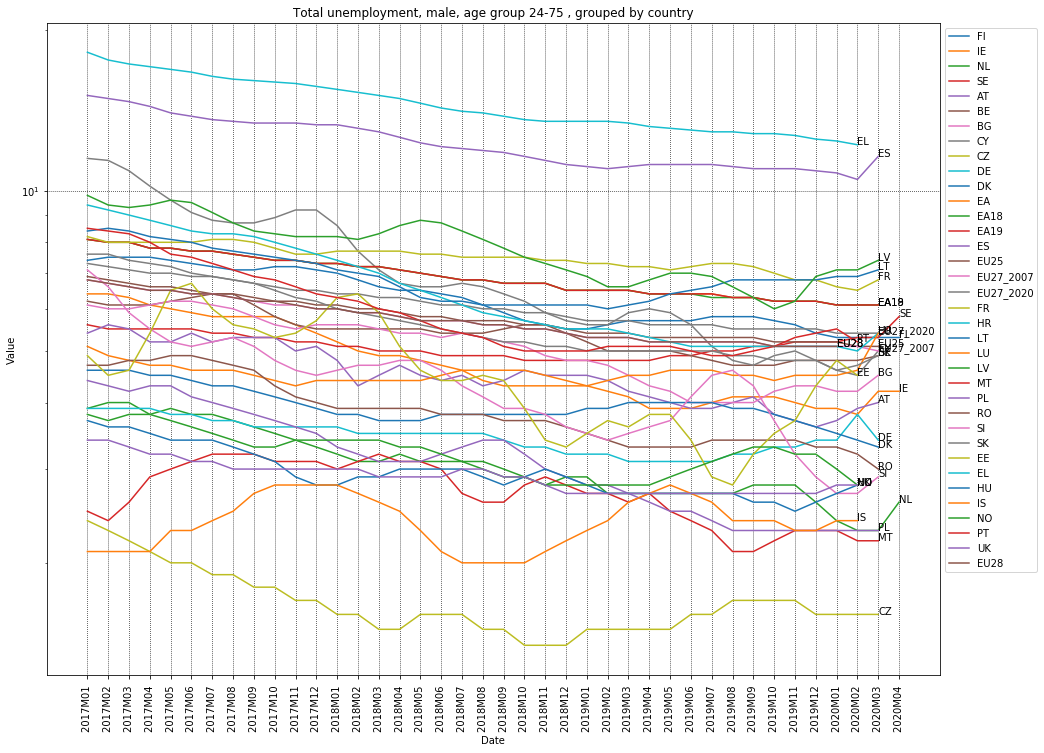

In [25]:
total_M_y25_74_df = data_tr_df.loc[(data_tr_df.age=='Y25-74')&(data_tr_df.unit=='PC_ACT')&(data_tr_df.sex=='M')&(data_tr_df.s_adj=='TC')]
plot_time_variation(total_M_y25_74_df, size=4, is_log=True, title = "male, age group 24-75 ")

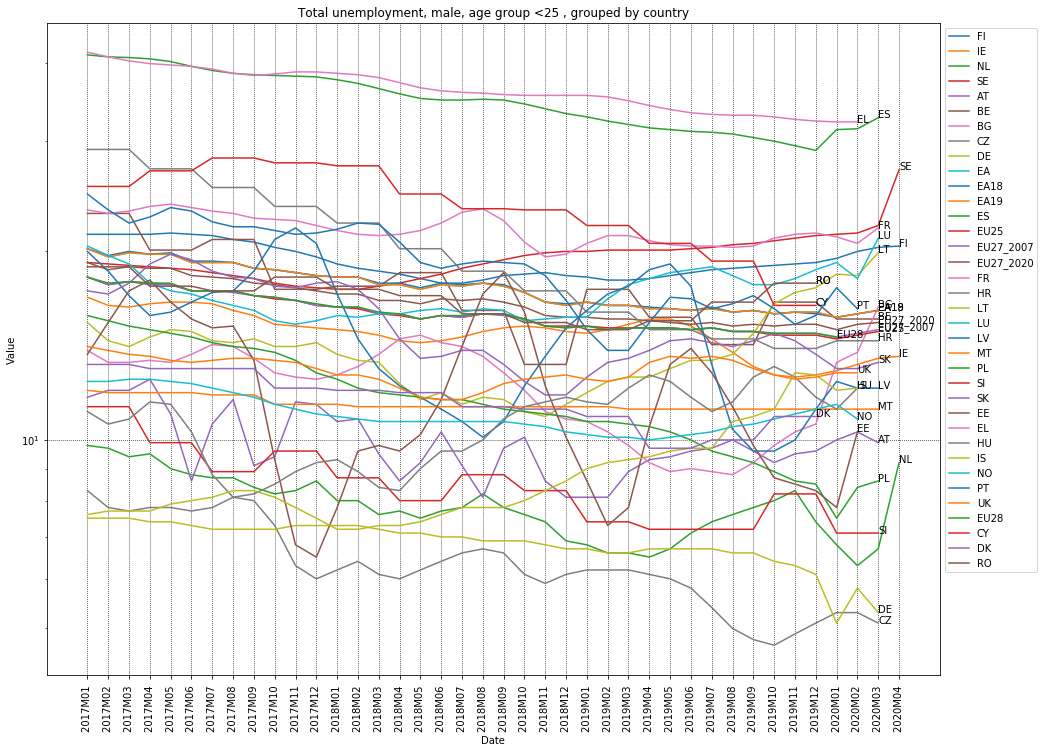

In [26]:
total_M_y25_df = data_tr_df.loc[(data_tr_df.age=='Y_LT25')&(data_tr_df.unit=='PC_ACT')&(data_tr_df.sex=='M')&(data_tr_df.s_adj=='TC')]
plot_time_variation(total_M_y25_df, size=4, is_log=True, title = "male, age group <25 ")

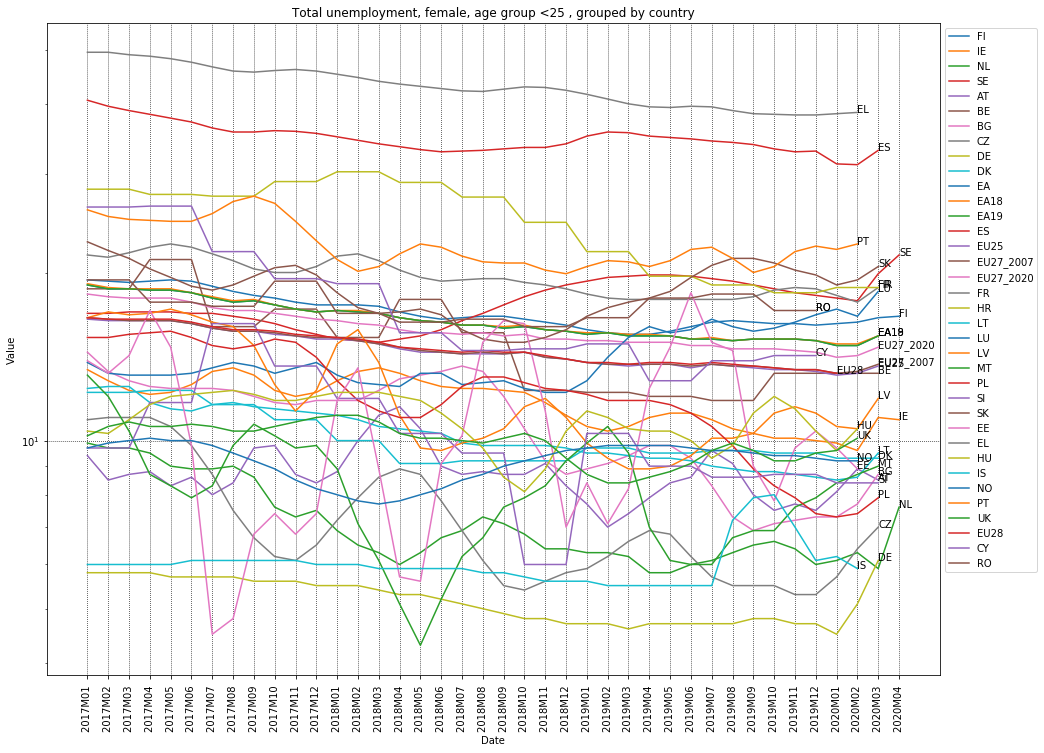

In [27]:
total_F_y25_df = data_tr_df.loc[(data_tr_df.age=='Y_LT25')&(data_tr_df.unit=='PC_ACT')&(data_tr_df.sex=='F')&(data_tr_df.s_adj=='TC')]
plot_time_variation(total_F_y25_df, size=4, is_log=True, title = "female, age group <25 ")

### Compare age group, sex / country

In [28]:
def plot_time_variation_age_sex(data_tr_df, y='Value', country="NL"):
    c_df = data_tr_df.loc[(data_tr_df.country==country)&(data_tr_df.unit=='PC_ACT')&(data_tr_df.s_adj=='TC')]
    f, ax = plt.subplots(1,1, figsize=(16,12))
    sns.lineplot(x="Date", y=y, data=c_df.loc[(c_df.age=='Y_LT25')&(c_df.sex=='F')],  label="Female, <25y")  
    sns.lineplot(x="Date", y=y, data=c_df.loc[(c_df.age=='Y_LT25')&(c_df.sex=='M')],  label="Male, <25y")  
    sns.lineplot(x="Date", y=y, data=c_df.loc[(c_df.age=='Y25-74')&(c_df.sex=='F')],  label="Female, 25-74y")  
    sns.lineplot(x="Date", y=y, data=c_df.loc[(c_df.age=='Y25-74')&(c_df.sex=='M')],  label="Male, <25-74y")  

    plt.xticks(rotation=90)
    plt.title(f'Total unemployment in {country}, grouped by age & sex')
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()  

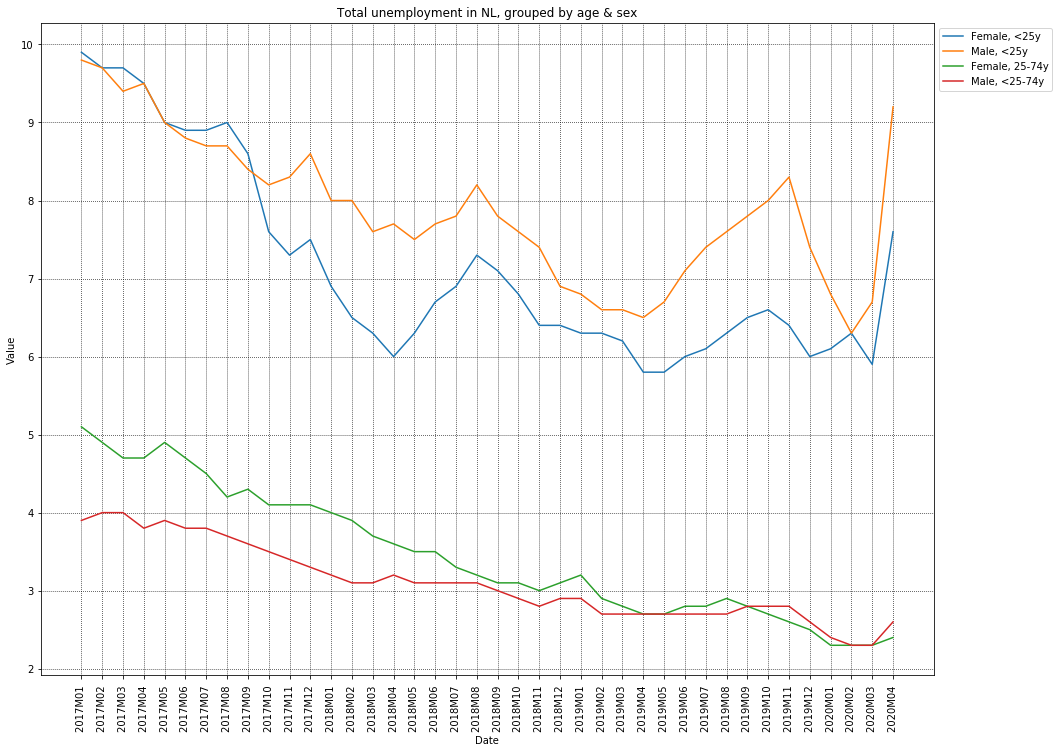

In [29]:
plot_time_variation_age_sex(data_tr_df,country="NL")

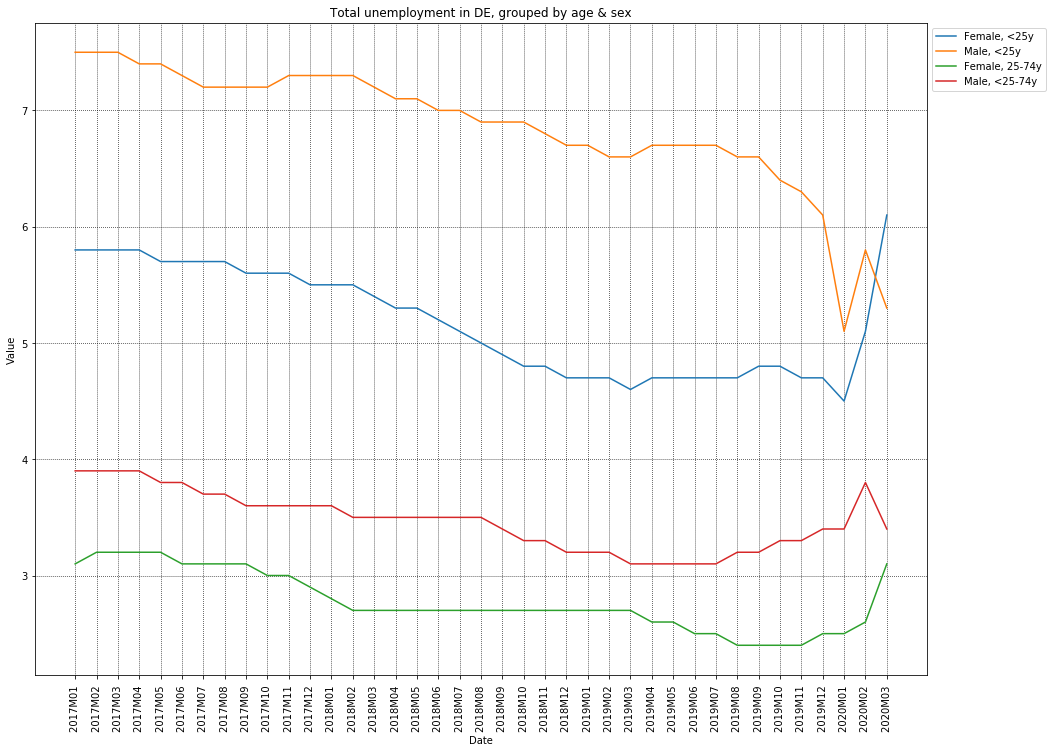

In [30]:
plot_time_variation_age_sex(data_tr_df,country="DE")

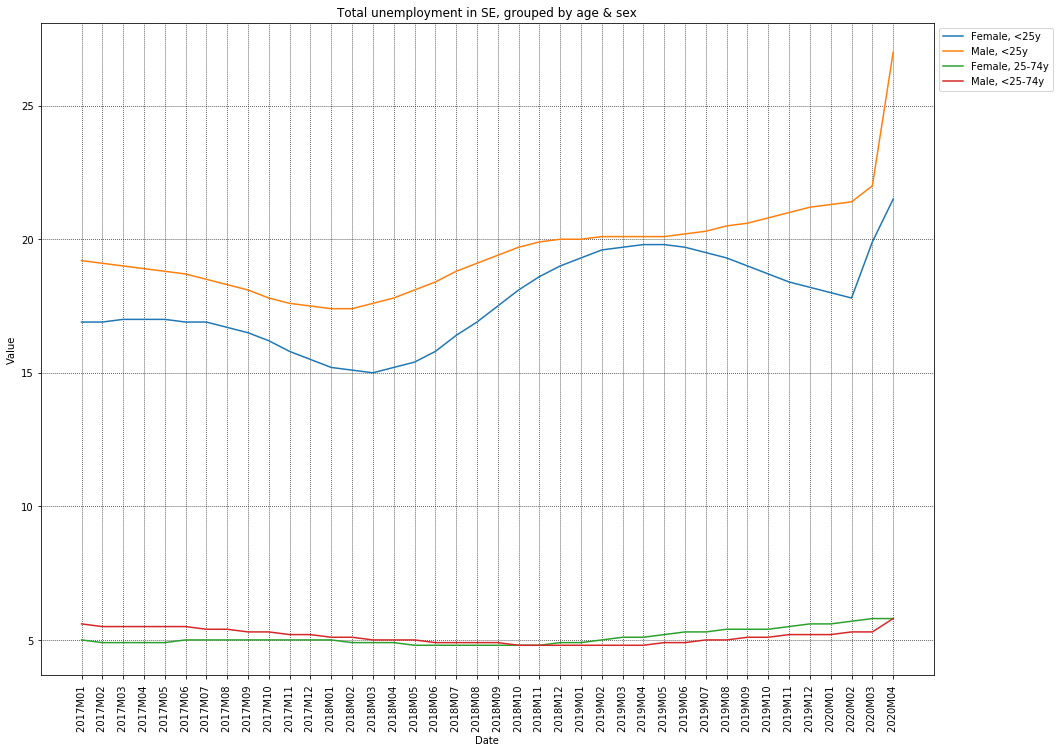

In [31]:
plot_time_variation_age_sex(data_tr_df,country="SE")

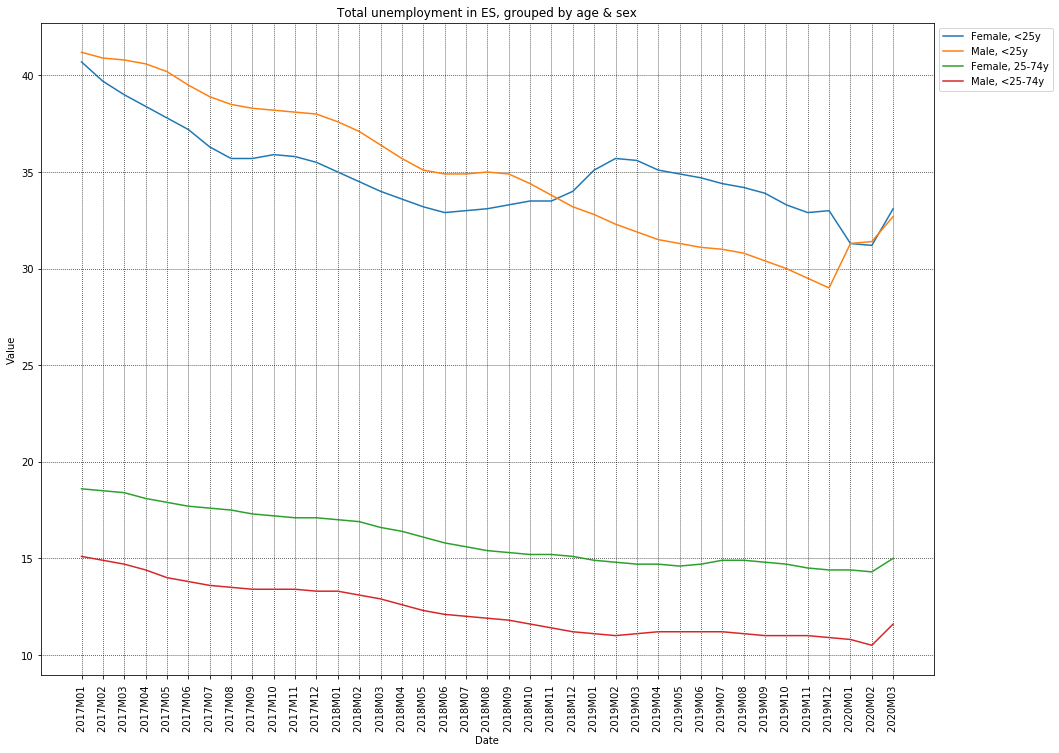

In [32]:
plot_time_variation_age_sex(data_tr_df,country="ES")

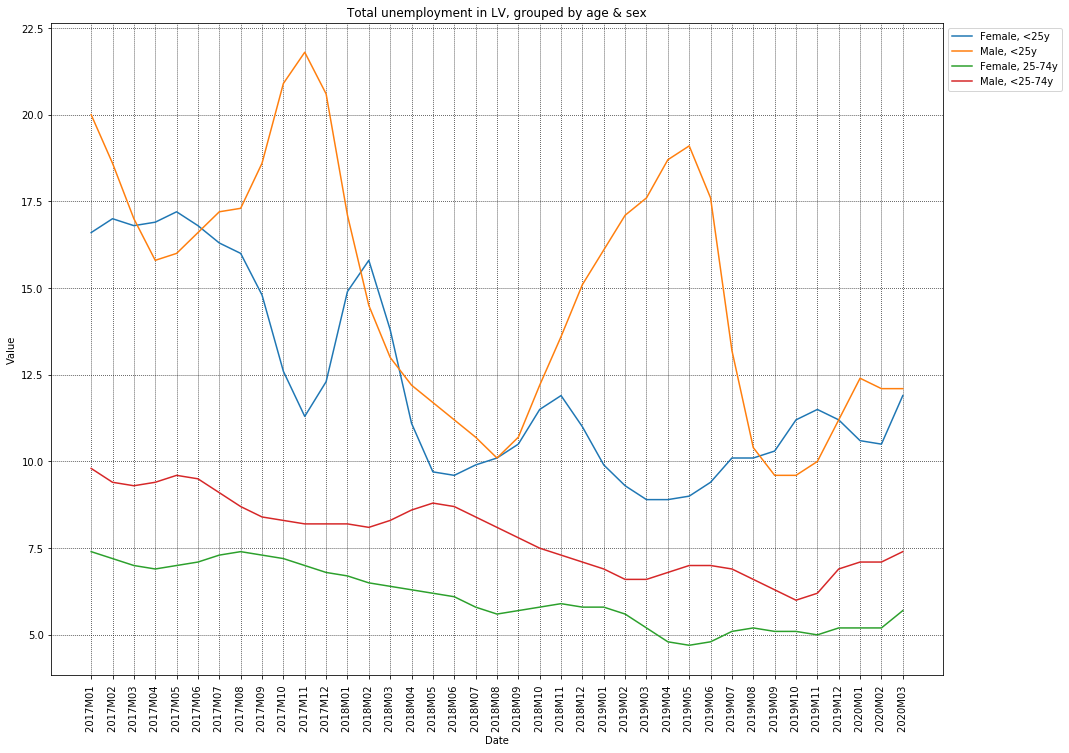

In [33]:
plot_time_variation_age_sex(data_tr_df,country="LV")

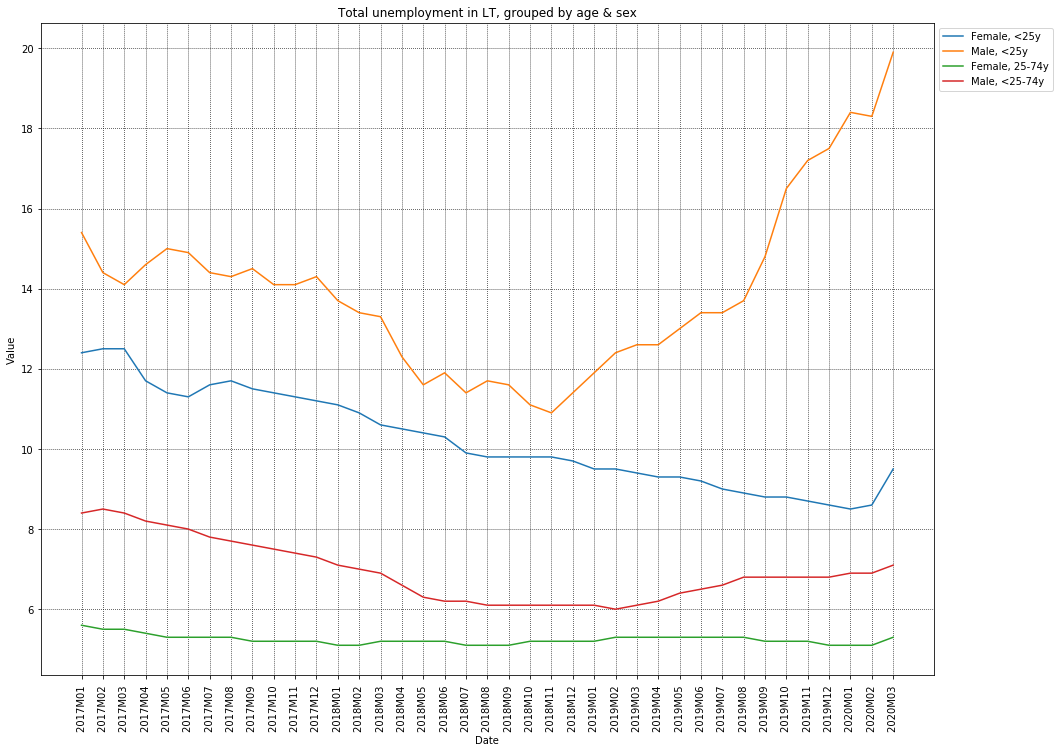

In [34]:
plot_time_variation_age_sex(data_tr_df,country="LT")